<a href="https://colab.research.google.com/github/yahia-kplr/Statistics-With-Python_fr/blob/main/Solution/5_Probability_(using_Python).ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Une introduction concrète aux probabilités (en utilisant Python)**


En 1814, Pierre-Simon Laplace écrit :

- La théorie des probabilités n'est rien d'autre que le bon sens réduit au calcul. ... [La probabilité] est donc simplement une fraction dont le numérateur est le nombre de cas favorables et dont le dénominateur est le nombre de tous les cas possibles ... alors que rien ne permet de s'attendre à ce que l'un de ces cas se produise plus que n'importe lequel autre.

Laplace
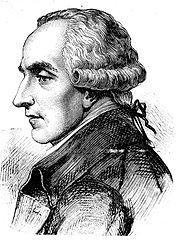


- Pour démêler un problème de probabilité, tout ce que vous avez à faire est de définir exactement quels sont les cas, et de compter soigneusement les cas favorables et totaux. Soyons clairs sur nos mots de vocabulaire :

- [Essai](https://en.wikipedia.org/wiki/Experiment_(probability_theory%29)Une occurrence unique avec un résultat incertain jusqu'à ce que nous l'observions.
Par exemple, lancer un seul dé.
- [Outcome](https://en.wikipedia.org/wiki/Outcome_(probability%29) : résultat possible d'un procès ; un état particulier du monde. Ce que Laplace appelle un cas.
Par exemple : 4.
Espace d'échantillonnage : L'ensemble de tous les résultats possibles pour l'essai.
Par exemple, {1, 2, 3, 4, 5, 6}.
- [Événement](https://en.wikipedia.org/wiki/Event_(probability_theory%29) : un sous-ensemble de l'espace d'échantillonnage, un ensemble de résultats qui, ensemble, ont une propriété qui nous intéresse.
Par exemple, l'événement "même lancer de dé" est l'ensemble des résultats {2, 4, 6}.
- Probabilité : Comme l'a dit Laplace, la probabilité d'un événement par rapport à un espace d'échantillonnage est le « nombre de cas favorables » (résultats de l'espace d'échantillonnage qui sont dans l'événement) divisé par le « nombre de tous les cas » dans l'espace d'échantillonnage.
- l'espace d'échantillonnage (en supposant que "rien ne nous amène à attendre que l'un de ces cas se produise plus que tout autre").
- Puisqu'il s'agit d'une fraction propre, la probabilité sera toujours un nombre compris entre 0 (représentant un événement impossible) et 1 (représentant un certain événement).

Par exemple, la probabilité d'un d pair


In [ ]:
from fractions import Fraction

def P(event, space): 
    "The probability of an event, given a sample space."
    return Fraction(cases(favorable(event, space)), 
                    cases(space))

favorable = set.intersection # Outcomes that are in the event and in the sample space
cases     = len              # The number of cases is the length, or size, of a set

# **Problème 1 : Le rouleau**


+ Quelle est la probabilité d'obtenir un nombre pair avec un seul dé équitable à six faces ? Les mathématiciens utilisent traditionnellement une seule lettre majuscule pour désigner un espace échantillon ;


In [ ]:
D     = {1, 2, 3, 4, 5, 6} # a sample space
even  = {   2,    4,    6} # an event

P(even, D)

Fraction(1, 2)

+ Quelle est la probabilité d'obtenir un nombre impair avec un seul dé équitable à six faces ? Les mathématiciens utilisent traditionnellement une seule lettre majuscule pour désigner un espace échantillon ;


In [ ]:
prime = {2, 3, 5, 7, 11, 13}
odd   = {1, 3, 5, 7, 9, 11, 13}

In [ ]:
P(odd, D)

Fraction(1, 2)

- La probabilité d'un jet de dé pair ou premier ?


In [ ]:
P((even | prime), D) # The probability of an even or prime die roll

Fraction(5, 6)

- La probabilité d'un jet de dé impair et premier ?


In [ ]:
P((odd & prime), D) # The probability of an odd prime die roll

Fraction(1, 3)

# **Problème 2 : Carte**


- Envisagez de distribuer une main de cinq cartes à jouer. Une carte individuelle a un rang et une couleur, comme « J♥ » pour le valet de cœur, et un jeu contient 52 cartes :


In [ ]:
suits = u'♥♠♦♣'
ranks = u'AKQJT98765432'
deck  = [r + s for r in ranks for s in suits]
len(deck)

52

- Maintenant, je veux définir les mains comme l'espace échantillon de toutes les combinaisons de 5 cartes du jeu. La fonction itertools.combinations fait la majeure partie du travail ; nous concaténons ensuite chaque combinaison dans une chaîne séparée par des espaces :


In [ ]:
import itertools

def combos(items, n):
    "All combinations of n items; each combo as a space-separated str."
    return set(map(' '.join, itertools.combinations(items, n)))

Hands = combos(deck, 5)
len(Hands)

2598960

- Il y a trop de mains pour toutes les regarder, mais on peut goûter :


In [ ]:
import random
random.sample(Hands, 7)

['A♦ 9♣ 5♣ 3♣ 2♠',
 'K♥ K♣ J♥ T♦ 3♦',
 'K♠ K♦ Q♣ 6♦ 3♠',
 'A♣ J♦ 9♠ 6♥ 2♠',
 'K♥ 7♥ 7♠ 6♠ 4♥',
 'K♥ 8♠ 7♣ 5♣ 2♣',
 'Q♣ J♦ 4♥ 4♣ 2♠']

In [ ]:
random.sample(deck, 7)

['2♣', '3♥', '2♠', 'T♠', '9♥', '7♠', 'T♣']

- Nous pouvons maintenant répondre à des questions comme la probabilité de recevoir une couleur (5 cartes de la même couleur) :


In [ ]:
flush = {hand for hand in Hands if any(hand.count(suit) == 5 for suit in suits)}

P(flush, Hands)

Fraction(33, 16660)

- Soit la probabilité d'un carré :


In [ ]:
four_kind = {hand for hand in Hands if any(hand.count(rank) == 4 for rank in ranks)}

P(four_kind, Hands)


Fraction(1, 4165)

# **Problèmes d'urne**


- Vers 1700, Jacob Bernoulli a écrit sur le retrait de boules colorées d'une urne dans son traité historique Ars Conjectandi, et depuis lors, les explications de la probabilité se sont appuyées sur des problèmes d'urne. (On pourrait penser que les urnes seraient vides maintenant.)

- Par exemple, voici un problème en trois parties adapté de mathforum.org :

- Une urne contient 6 boules bleues, 9 rouges et 8 blanches. Nous sélectionnons six balles au hasard. Quelle est la probabilité de chacun de ces résultats :

- Toutes les balles sont rouges.
- 3 sont bleues, et 1 est rouge, et 2 sont blanches, .
- Exactement 4 boules sont blanches.

- Nous allons commencer par définir le contenu de l'urne.
- Un ensemble ne peut pas contenir plusieurs objets égaux les uns aux autres, donc j'appellerai les boules bleues 'B1' à 'B6', plutôt que d'essayer d'avoir 6 boules toutes appelées 'B' :


In [ ]:
def balls(color, n):
    "A set of n numbered balls of the given color."
    return {color + str(i)
            for i in range(1, n + 1)}

urn = balls('B', 6) | balls('R', 9) | balls('W', 8)
urn

{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8'}

Nous pouvons maintenant définir l'espace d'échantillonnage, U6, comme l'ensemble de toutes les combinaisons à 6 boules :


In [ ]:
U6 = combos(urn, 6)

random.sample(U6, 5)

['W3 R4 B1 W4 R1 R9',
 'R5 W3 R4 R2 B6 R1',
 'W7 R5 B1 W1 R8 R9',
 'W7 W5 B5 B1 B6 W4',
 'W8 R5 W3 R7 R8 R9']

Définissez select de sorte que select('R', 6) soit l'événement de cueillette de 6 boules rouges dans l'urne :


In [ ]:
def select(color, n, space=U6):
    "The subset of the sample space with exactly `n` balls of given `color`."
    return {s for s in space if s.count(color) == n}

NOUS pouvons maintenant répondre aux trois questions :


In [ ]:
P(select('R', 6), U6) 

Fraction(4, 4807)

In [ ]:
P(select('B', 3)  & select('R', 1) & select('W', 2), U6)

Fraction(240, 4807)

In [ ]:
P(select('W', 4), U6)

Fraction(350, 4807)